In [ ]:
%pip uninstall -y tensorflow
%pip install python-doctr[torch,viz]

In [2]:
from doctr.io import DocumentFile
from doctr.models import ocr_predictor

c:\Users\Hemant.Singhsidar\Desktop\Assignments\DATP\PDF Extraction\Unstructured\envT\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Download a sample
#!wget https://eforms.com/download/2019/01/Cash-Payment-Receipt-Template.pdf
# Read the file
doc = DocumentFile.from_images("Cropped Tables\Page 1_Table 1.png")
print(f"Number of pages: {len(doc)}")

Number of pages: 1


In [4]:
predictor = ocr_predictor(pretrained=True)

In [5]:
result = predictor(doc)

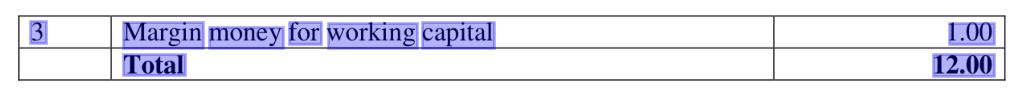

In [6]:
result.show()

In [ ]:
result

In [9]:
result.render()

'3\nMargin money for working capital\n1.00\nTotal\n12.00'

In [10]:
import pandas as pd
df = pd.DataFrame([result.__dict__])  # Convert the object's attributes to a dictionary

In [11]:
json_export = result.export()
print(json_export)

{'pages': [{'page_idx': 0, 'dimensions': (98, 1245), 'orientation': {'value': None, 'confidence': None}, 'language': {'value': None, 'confidence': None}, 'blocks': [{'geometry': ((0.01953125, 0.14021643813775508), (0.9833984375, 0.8473772321428572)), 'objectness_score': 0.8218172589937845, 'lines': [{'geometry': ((0.01953125, 0.14021643813775508), (0.03515625, 0.42556202168367346)), 'objectness_score': 0.7646592259407043, 'words': [{'value': '3', 'confidence': 0.999855637550354, 'geometry': ((0.01953125, 0.14021643813775508), (0.03515625, 0.42556202168367346)), 'objectness_score': 0.7646592259407043, 'crop_orientation': {'value': 0, 'confidence': None}}]}, {'geometry': ((0.1123046875, 0.15262276785714285), (0.4833984375, 0.48759367028061223)), 'objectness_score': 0.8195693731307984, 'words': [{'value': 'Margin', 'confidence': 0.8865423202514648, 'geometry': ((0.1123046875, 0.15262276785714285), (0.1923828125, 0.48759367028061223)), 'objectness_score': 0.7899243235588074, 'crop_orientat

In [12]:
import json

# Export the result as a JSON-compatible structure (dict/list)
json_export = result.export()

# Save it to a JSON file
with open("ocr_output.json", "w", encoding="utf-8") as f:
    json.dump(json_export, f, ensure_ascii=False, indent=4)

print("OCR results successfully saved to 'ocr_output.json'")

OCR results successfully saved to 'ocr_output.json'


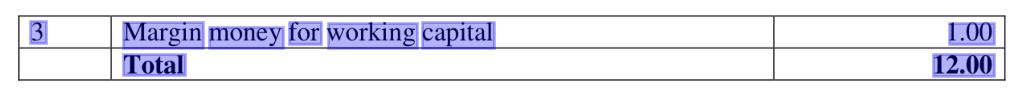

In [13]:
page = result.pages[0].show()

In [14]:
# string_result_page = page.render()
# print(string_result_page)

In [15]:
string_result = result.render()
print(string_result)

3
Margin money for working capital
1.00
Total
12.00


In [16]:
page_2 = result.pages[0]
if page_2 is None:
    print("Page 2 is None or does not exist!")
else:
    page_data = page_2.export()  # returns a dict
    text_lines = []
    
    # Each "block" contains "lines"; each "line" contains "words"
    for block in page_data["blocks"]:
        for line in block["lines"]:
            # Join all the word values (i.e. recognized tokens)
            line_text = " ".join(word["value"] for word in line["words"])
            text_lines.append(line_text)
    
    # Combine lines into one string
    page_text = "\n".join(text_lines)
    print(page_text)


3
Margin money for working capital
1.00
Total
12.00
